# Training CNN for the Movement Recognition task, execution trials

In this notebook, we train CNNs on the movement recognition when the subject executes the task, using PyTorch.

### Import librairies

In [1]:
from utils import *
from dataset import *
from constants import *

import os
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

from dataset import Participant
from models.DeepModels import *
from models.DeepUtils import *

# Reproducibility
seed_num = RANDOM_STATE # This seed will be used for all random number generators
torch.use_deterministic_algorithms(True) # PyTorch will use deterministic algorithms fro operations with stochastic behavior like dropout
random.seed(seed_num) # Python's random will use seed_num
np.random.seed(seed_num) # NumPy's random number generator will use seed_num
torch.manual_seed(seed_num) # PyTorch's random number will use seed_num

### Data loading

Change here the participant to load.

In [2]:
use_saved = True
part_name = 's6'

In [3]:
if use_saved and os.path.exists(f'saved/{part_name}.pkl'):
    participant = Participant.load_from_pickle(f'saved/{part_name}.pkl')
else:
    participant = Participant(part_name, data_path=DATA_PATH_NOTEBOOK, alpha=0.05)
    saved_dir = os.path.join(os.getcwd(), 'saved')
    if not os.path.exists(saved_dir):
        os.makedirs(saved_dir)
    with open(f'saved/{part_name}.pkl', 'wb') as f:
        pickle.dump(participant, f, pickle.HIGHEST_PROTOCOL)

## 2D convolutional network

The 2D convolutional network treats the signals' timepoints as pixels of an image.

In [4]:
channels = participant.relevant_channels_ex
channels_id = [channel.idx for channel in channels]
sessions = participant.sessions
signals = []
labels = []
for session in sessions:
    for trial in session.trials:
        if trial.action_type == 'E':
            signals.append([trial.get_signal()[channels_id, :]])
            labels.append(1 if trial.object_size == 'S' else 0)
        
signals = torch.Tensor(np.array(signals))
labels = torch.Tensor(labels).long()
print(signals.shape)

torch.Size([128, 1, 68, 1500])


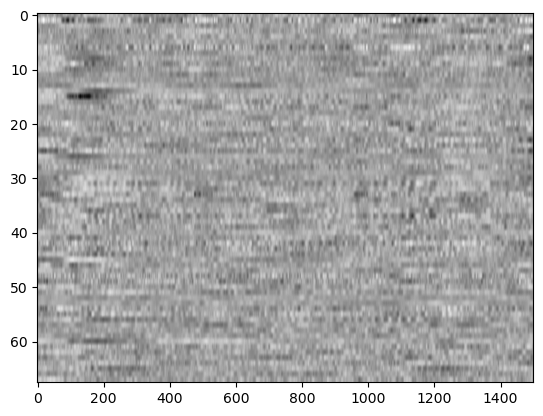

In [5]:
plt.imshow(signals[0][0], cmap='Greys', aspect='auto')

### Dataset preparation

In [6]:
signal_dataset = TensorDataset(signals, labels)
train_set, val_set = torch.utils.data.random_split(signal_dataset, [int(0.8 * len(signal_dataset)), len(signal_dataset) - int(0.8 * len(signal_dataset))])
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=False)

### Model preparation

In [7]:
model = CNN2D(signals.shape[1], 2, height=signals.shape[2], layers=(32, 16),
    width=signals.shape[3], channels=(2, 4), paddings=(1, 1),
    strides=(3, 3), convkernels=(5, 3), maxpoolkernels=(2, 2))
trainer = Trainer(model, 0.001, 10, 10)

Finally, train the model:

In [8]:
trainer.train(train_loader, val_loader)

Epoch 1/10 - Training:   0%|          | 0/26 [00:00<?, ?it/s]

Epoch 1/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 55.64it/s]


Epoch: 1 	Training Loss: 0.692170 	Training Acc: 0.509804


Epoch 1/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 327.57it/s]


Epoch: 1 	Validation Loss: 0.691211 	Validation Acc: 0.538462


Epoch 2/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 88.33it/s]


Epoch: 2 	Training Loss: 0.650465 	Training Acc: 0.911765


Epoch 2/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 410.59it/s]


Epoch: 2 	Validation Loss: 0.688497 	Validation Acc: 0.615385


Epoch 3/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 67.82it/s]


Epoch: 3 	Training Loss: 0.621540 	Training Acc: 0.950980


Epoch 3/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 413.30it/s]


Epoch: 3 	Validation Loss: 0.681747 	Validation Acc: 0.653846


Epoch 4/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 74.02it/s]


Epoch: 4 	Training Loss: 0.551336 	Training Acc: 0.960784


Epoch 4/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 233.46it/s]


Epoch: 4 	Validation Loss: 0.673002 	Validation Acc: 0.653846


Epoch 5/10 - Training: 100%|██████████| 26/26 [00:01<00:00, 20.84it/s]


Epoch: 5 	Training Loss: 0.434922 	Training Acc: 0.931373


Epoch 5/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 447.97it/s]


Epoch: 5 	Validation Loss: 0.664995 	Validation Acc: 0.615385


Epoch 6/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 68.07it/s]


Epoch: 6 	Training Loss: 0.291746 	Training Acc: 0.960784


Epoch 6/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 448.34it/s]


Epoch: 6 	Validation Loss: 0.672405 	Validation Acc: 0.538462


Epoch 7/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 81.26it/s]


Epoch: 7 	Training Loss: 0.227819 	Training Acc: 0.990196


Epoch 7/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 334.08it/s]


Epoch: 7 	Validation Loss: 0.645374 	Validation Acc: 0.692308


Epoch 8/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 70.94it/s]


Epoch: 8 	Training Loss: 0.201567 	Training Acc: 1.000000


Epoch 8/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 424.91it/s]


Epoch: 8 	Validation Loss: 0.615604 	Validation Acc: 0.500000


Epoch 9/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 41.92it/s]


Epoch: 9 	Training Loss: 0.206869 	Training Acc: 1.000000


Epoch 9/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 504.66it/s]


Epoch: 9 	Validation Loss: 0.592905 	Validation Acc: 0.653846


Epoch 10/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 93.47it/s] 


Epoch: 10 	Training Loss: 0.213066 	Training Acc: 0.990196


Epoch 10/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 447.96it/s]

Epoch: 10 	Validation Loss: 0.624982 	Validation Acc: 0.730769


0.6249821827961848

## 1D convolutional network

1D convolutional network treats the signal as it is, that is, a timeserie.

In [9]:
channels = participant.relevant_channels_both
channels_id = [channel.idx for channel in channels]
sessions = participant.sessions
signals = []
labels = []
for session in sessions:
    for trial in session.trials:
        if trial.action_type == 'E':
            signals.append(trial.get_signal()[channels_id, :])
            labels.append(1 if trial.object_size == 'S' else 0)
        
signals = torch.Tensor(np.array(signals))
labels = torch.Tensor(labels).long()
print(signals.shape)

torch.Size([128, 40, 1500])


### Dataset preparation

In [10]:
signal_dataset = TensorDataset(signals, labels)
train_set, val_set = torch.utils.data.random_split(signal_dataset, [int(0.8 * len(signal_dataset)), len(signal_dataset) - int(0.8 * len(signal_dataset))])
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=False)

### Model preparation

In [11]:
model = CNN1D(signals.shape[1], 2, length=signals.shape[2],
    channels=(8, 16), paddings=(1, 1), strides=(5, 5), convkernels=(10, 50), maxpoolkernels=(2, 2))
trainer = Trainer(model, 0.001, 10, 10)

Finally, train the model:

In [12]:
trainer.train(train_loader, val_loader)

Epoch 1/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 76.72it/s] 


Epoch: 1 	Training Loss: 0.667286 	Training Acc: 0.588235


Epoch 1/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 781.19it/s]


Epoch: 1 	Validation Loss: 0.643694 	Validation Acc: 0.807692


Epoch 2/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 86.99it/s]


Epoch: 2 	Training Loss: 0.418188 	Training Acc: 0.950980


Epoch 2/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 448.01it/s]


Epoch: 2 	Validation Loss: 0.551754 	Validation Acc: 0.615385


Epoch 3/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 174.66it/s]


Epoch: 3 	Training Loss: 0.123028 	Training Acc: 0.970588


Epoch 3/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 262.48it/s]


Epoch: 3 	Validation Loss: 0.412833 	Validation Acc: 0.730769


Epoch 4/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 140.05it/s]


Epoch: 4 	Training Loss: 0.020472 	Training Acc: 1.000000


Epoch 4/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 291.07it/s]


Epoch: 4 	Validation Loss: 0.466114 	Validation Acc: 0.769231


Epoch 5/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 161.10it/s]


Epoch: 5 	Training Loss: 0.004925 	Training Acc: 1.000000


Epoch 5/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 657.46it/s]


Epoch: 5 	Validation Loss: 0.492593 	Validation Acc: 0.807692


Epoch 6/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 156.06it/s]


Epoch: 6 	Training Loss: 0.001708 	Training Acc: 1.000000


Epoch 6/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 334.88it/s]


Epoch: 6 	Validation Loss: 0.512283 	Validation Acc: 0.769231


Epoch 7/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 145.18it/s]


Epoch: 7 	Training Loss: 0.001759 	Training Acc: 1.000000


Epoch 7/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 447.99it/s]


Epoch: 7 	Validation Loss: 0.515791 	Validation Acc: 0.769231


Epoch 8/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 107.02it/s]


Epoch: 8 	Training Loss: 0.000827 	Training Acc: 1.000000


Epoch 8/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 527.05it/s]


Epoch: 8 	Validation Loss: 0.513718 	Validation Acc: 0.807692


Epoch 9/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 137.78it/s]


Epoch: 9 	Training Loss: 0.001192 	Training Acc: 1.000000


Epoch 9/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 447.89it/s]


Epoch: 9 	Validation Loss: 0.531881 	Validation Acc: 0.807692


Epoch 10/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 139.46it/s]


Epoch: 10 	Training Loss: 0.000709 	Training Acc: 1.000000


Epoch 10/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 447.88it/s]

Epoch: 10 	Validation Loss: 0.518251 	Validation Acc: 0.807692


0.5182512189046695